## Part 1: Introduction to Threat Modeling

### Why Do We Need Structured Threat Models?

**The Challenge:**
- Cybersecurity threats are constantly evolving
- Signature-based detection (antivirus) is insufficient for APTs
- Security teams need a common language to describe adversary behavior
- Threat intelligence must be actionable and shareable

**Historical Evolution:**
1. **Pre-2011:** Ad-hoc threat descriptions, vendor-specific terminology
2. **2011:** Lockheed Martin introduces the **Cyber Kill Chain**
3. **2013:** MITRE releases **ATT&CK** framework
4. **2015+:** ATT&CK becomes industry standard for threat intelligence

### Discussion Question:
*Why can't we just rely on antivirus signatures and firewalls?*

**Key Insight:** Modern threats use:
- Living-off-the-land techniques (legitimate tools used maliciously)
- Fileless malware (memory-resident attacks)
- Zero-day exploits (no signatures exist yet)
- Behavioral evasion (polymorphic malware)

→ **Solution:** Focus on adversary *behavior* rather than specific malware samples

## Part 2: The Cyber Kill Chain Model

### Seven Phases of Attack Progression

The Lockheed Martin Cyber Kill Chain provides a linear model of attack stages:

```
1. RECONNAISSANCE → 2. WEAPONIZATION → 3. DELIVERY → 4. EXPLOITATION 
   ↓                                                              ↓
7. ACTIONS ON    ← 6. COMMAND & CONTROL ← 5. INSTALLATION
   OBJECTIVES
```

#### Detailed Phase Breakdown:

| Phase | Description | Defensive Opportunity | Example |
|-------|-------------|----------------------|----------|
| **1. Reconnaissance** | Research, identify, and select targets | Web analytics, honeypots | WHOIS lookup, LinkedIn scraping |
| **2. Weaponization** | Couple exploit with backdoor | None (happens offline) | Creating malicious PDF with exploit |
| **3. Delivery** | Transmit weapon to target | Email security, web filtering | Phishing email, watering hole |
| **4. Exploitation** | Trigger exploit code | Endpoint protection, patching | Buffer overflow, CVE exploitation |
| **5. Installation** | Install persistent backdoor | Host-based detection | Registry modification, service creation |
| **6. Command & Control** | Establish C2 channel | Network monitoring, DNS analysis | Beaconing to C2 server |
| **7. Actions on Objectives** | Achieve mission goal | DLP, behavioral analytics | Data exfiltration, ransomware |

### Key Insights:
- **Easiest detection:** Early stages (Delivery, Exploitation)
- **Most damaging:** Later stages (Actions on Objectives)
- **Attribution opportunities:** Reconnaissance, C2 infrastructure
- **Breaking the chain:** Stopping at ANY phase prevents mission success

### Limitations of Kill Chain:
1. ❌ Assumes linear progression (real attacks loop and branch)
2. ❌ Too high-level for operational detection
3. ❌ Doesn't capture post-exploitation complexity
4. ❌ Focuses on perimeter breach (misses insider threats, supply chain)

→ **This is where MITRE ATT&CK provides more granularity**

## Part 3: Introduction to MITRE ATT&CK

### What is ATT&CK?

**ATT&CK** = **A**dversarial **T**actics, **T**echniques, and **C**ommon **K**nowledge

**Core Philosophy:**
- 🎯 **Behavior-focused:** Documents *how* adversaries operate, not *what* malware they use
- 📊 **Evidence-based:** Built from real-world observations and threat intelligence
- 🌐 **Technology-agnostic:** Applies across platforms (Windows, Linux, macOS, Cloud, Mobile)
- 🤝 **Community-driven:** Contributions from global security researchers

### ATT&CK Matrices:

1. **Enterprise** - Corporate IT environments (most common)
   - Windows, Linux, macOS, Cloud (Azure, AWS, GCP), Network
   - 14 tactics, ~200 techniques, ~400 sub-techniques

2. **Mobile** - iOS and Android threats
   - 14 tactics specific to mobile devices

3. **ICS** - Industrial Control Systems
   - Critical infrastructure and OT environments
   - 12 tactics for ICS-specific threats

### ATT&CK vs Kill Chain Comparison

| Aspect | Cyber Kill Chain | MITRE ATT&CK |
|--------|------------------|---------------|
| **Structure** | Linear 7 phases | Matrix (14 tactics × 200+ techniques) |
| **Granularity** | High-level strategic | Detailed operational |
| **Focus** | Attack stages | Adversary behaviors |
| **Flexibility** | Sequential flow | Non-linear, multiple paths |
| **Use Case** | Strategic planning | Detection engineering, threat hunting |
| **Actionability** | Defense-in-depth strategy | Specific detection/mitigation rules |
| **Updates** | Static (2011) | Continuously updated (quarterly releases) |

### How They Work Together:
- **Kill Chain:** Strategic view of attack progression
- **ATT&CK:** Tactical details of *how* each phase is executed

**Example Mapping:**
```
Kill Chain Phase: DELIVERY
  └─> ATT&CK Tactic: Initial Access (TA0001)
       ├─> Technique: Phishing (T1566)
       │    ├─> Sub-technique: Spearphishing Attachment (T1566.001)
       │    ├─> Sub-technique: Spearphishing Link (T1566.002)
       │    └─> Sub-technique: Spearphishing via Service (T1566.003)
       └─> Technique: Exploit Public-Facing Application (T1190)
```

## Part 4: ATT&CK Core Data Model

### Primary Objects in ATT&CK

ATT&CK is structured as a knowledge graph with interconnected objects:

```
┌─────────────┐
│   TACTICS   │  ← The "WHY" (adversary goals)
└──────┬──────┘
       │
       ├─> 14 Enterprise Tactics (columns in matrix)
       │
┌──────▼──────────┐
│   TECHNIQUES    │  ← The "HOW" (methods to achieve goals)
└──────┬──────────┘
       │
       ├─> ~200 main techniques
       ├─> ~400 sub-techniques (more specific variants)
       │
┌──────▼──────────┐
│   PROCEDURES    │  ← The "WHO" (real-world examples)
└──────┬──────────┘
       │
       ├─> Used by GROUPS (threat actors)
       └─> Implemented via SOFTWARE (malware/tools)
```

### 1. Tactics (TA0001-TA0014)

**Definition:** High-level adversary goals during an attack

**14 Enterprise Tactics (in typical progression order):**

1. **Reconnaissance (TA0043)** - Gather information to plan future operations
2. **Resource Development (TA0042)** - Establish resources to support operations
3. **Initial Access (TA0001)** - Get into your network
4. **Execution (TA0002)** - Run malicious code
5. **Persistence (TA0003)** - Maintain foothold
6. **Privilege Escalation (TA0004)** - Gain higher-level permissions
7. **Defense Evasion (TA0005)** - Avoid being detected
8. **Credential Access (TA0006)** - Steal account credentials
9. **Discovery (TA0007)** - Learn about the environment
10. **Lateral Movement (TA0008)** - Move through the network
11. **Collection (TA0009)** - Gather data of interest
12. **Command and Control (TA0011)** - Communicate with compromised systems
13. **Exfiltration (TA0010)** - Steal data
14. **Impact (TA0040)** - Manipulate, interrupt, or destroy systems/data

**Important:** These are NOT sequential! Adversaries jump between tactics throughout an operation.

### 2. Techniques (T1XXX)

**Definition:** Specific methods adversaries use to accomplish tactical goals

**Characteristics:**
- Unique ID format: T1566, T1055, T1003, etc.
- Descriptive names: "Phishing", "Process Injection", "Credential Dumping"
- Each technique includes:
  - Detailed description of behavior
  - Applicable platforms (Windows, Linux, macOS, etc.)
  - Examples from real threat groups
  - Data sources required for detection
  - Mitigation recommendations
  - Detection analytics

**Example Technique: T1059 - Command and Scripting Interpreter**
- **Tactics:** Execution
- **Description:** Adversaries abuse command and script interpreters to execute commands, scripts, or binaries
- **Platforms:** Windows, Linux, macOS, Network
- **Sub-techniques:** PowerShell (T1059.001), Bash (T1059.004), Python (T1059.006), etc.

### 3. Sub-Techniques (T1XXX.YYY)

**Definition:** More specific variants of parent techniques (introduced in ATT&CK v7, 2020)

**Example: T1566 Phishing**
```
T1566 - Phishing (parent technique)
  ├── T1566.001 - Spearphishing Attachment
  ├── T1566.002 - Spearphishing Link
  ├── T1566.003 - Spearphishing via Service
  └── T1566.004 - Spearphishing Voice
```

**Why sub-techniques matter:**
- More precise detection rules
- Better telemetry requirements
- Targeted mitigations

### 4. Groups (G0XXX)

**Definition:** Threat actors, APT groups, and other adversaries

**Examples:**
- **G0016 - APT29 (Cozy Bear)** - Russian state-sponsored, targets government/think tanks
- **G0007 - APT28 (Fancy Bear)** - Russian military intelligence (GRU)
- **G0032 - Lazarus Group** - North Korean, financially motivated + espionage
- **G0096 - APT41** - Chinese, dual espionage and financial crime

**Group Profiles Include:**
- Aliases across different vendors
- Known techniques used
- Software/tools employed
- Target sectors and regions
- Campaign history

### 5. Software (S0XXX)

**Definition:** Malware families and tools (both custom and publicly available)

**Examples:**
- **S0154 - Cobalt Strike** - Legitimate penetration testing tool (often abused)
- **S0002 - Mimikatz** - Credential dumping utility
- **S0363 - Empire** - PowerShell post-exploitation framework
- **S0396 - EvilGrab** - Malware used by APT1

### 6. Mitigations (M1XXX)

**Definition:** Security controls/configurations that prevent or limit technique effectiveness

**Examples:**
- **M1049 - Antivirus/Antimalware** - Signature and behavior-based detection
- **M1038 - Execution Prevention** - Block execution of known malicious binaries
- **M1018 - User Account Management** - Limit account permissions
- **M1031 - Network Intrusion Prevention** - IDS/IPS to detect/block attacks

### 7. Data Sources (DS0XXX)

**Definition:** Types of telemetry required to detect techniques

**Examples:**
- **DS0009 - Process** - Process creation, termination, command-line arguments
- **DS0029 - Network Traffic** - Flow data, packet capture, DNS queries
- **DS0015 - Application Log** - Event logs from applications
- **DS0022 - File** - File creation, modification, deletion

**Data Components:** Specific aspects to collect
- Example: DS0009 (Process) has components:
  - Process Creation
  - Process Termination
  - Process Access
  - OS API Execution

## Part 5: ATT&CK Relationships

### Understanding Object Connections

The power of ATT&CK comes from relationships between objects:

```
┌─────────┐
│  GROUP  │─────uses─────> Technique
└────┬────┘                    │
     │                         │
     uses                mitigated-by
     │                         │
     ▼                         ▼
┌──────────┐            ┌────────────┐
│ SOFTWARE │────uses───>│ MITIGATION │
└──────────┘            └────────────┘
                              │
                        detected-by
                              │
                              ▼
                        ┌─────────────┐
                        │ DATA SOURCE │
                        └─────────────┘
```

### Example Relationship Chain:

**Scenario:** Understanding APT29's credential dumping operations

```
APT29 (G0016)
  │
  ├─[uses]─> Cobalt Strike (S0154)
  │            │
  │            └─[implements]─> Process Injection (T1055)
  │                               │
  │                               ├─[sub-technique]─> Process Hollowing (T1055.012)
  │                               ├─[detected-by]─> Process Monitoring (DS0009)
  │                               └─[mitigated-by]─> Behavior Prevention (M1040)
  │
  └─[uses]─> OS Credential Dumping (T1003)
               │
               ├─[sub-technique]─> LSASS Memory (T1003.001)
               ├─[detected-by]─> Process Access (DS0009)
               └─[mitigated-by]─> Privileged Account Management (M1026)
```

### Relationship Types:

| Relationship | Description | Example |
|--------------|-------------|----------|
| **uses** | Group/Software uses Technique | APT29 uses T1059.001 (PowerShell) |
| **mitigates** | Mitigation addresses Technique | M1049 (Antivirus) mitigates T1204 (User Execution) |
| **detects** | Data source enables detection | DS0009 (Process) detects T1055 (Process Injection) |
| **subtechnique-of** | Hierarchical technique relationship | T1566.001 is subtechnique of T1566 |
| **revoked-by** | Deprecated technique replaced | Old technique superseded by new one |

### Why Relationships Matter:

1. **Threat Intelligence:** Profile adversaries by their complete TTP patterns
2. **Detection Coverage:** Identify required data sources for monitoring
3. **Mitigation Planning:** Find common controls that address multiple techniques
4. **Gap Analysis:** Discover uncovered techniques in your security stack
5. **Prioritization:** Focus on techniques used by threats targeting your sector

## Part 6: Interactive Exploration Setup

Now let's install the required libraries to explore ATT&CK data programmatically.

### Required Libraries:
- **mitreattack-python** - Official MITRE ATT&CK library
- **stix2** - For parsing STIX-formatted threat intelligence
- **pandas** - Data manipulation and analysis
- **matplotlib & seaborn** - Visualization
- **networkx** - Graph analysis and visualization

In [10]:
# Install required libraries
# Note: Run this cell once at the beginning of the exercise

%pip install mitreattack-python stix2 pandas matplotlib seaborn networkx requests

print("\n✓ All libraries installed successfully!")

Note: you may need to restart the kernel to use updated packages.

✓ All libraries installed successfully!



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from stix2 import MemoryStore, Filter
import requests
import json
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configure visualization defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries imported successfully!")
print("Ready to explore ATT&CK data!")

✓ Libraries imported successfully!
Ready to explore ATT&CK data!


## Part 7: Loading ATT&CK Data

We'll load the ATT&CK Enterprise matrix from MITRE's TAXII server.

**What is STIX/TAXII?**
- **STIX** (Structured Threat Information Expression) - JSON-based format for cyber threat intelligence
- **TAXII** (Trusted Automated Exchange of Intelligence Information) - Protocol for sharing STIX data

MITRE publishes ATT&CK data in STIX 2.1 format via a public TAXII server.

In [3]:
# Function to load ATT&CK data from MITRE's CTI repository
def load_attack_data():
    """
    Load ATT&CK Enterprise data from MITRE's GitHub repository
    Returns a STIX MemoryStore containing all ATT&CK objects
    """
    print("Loading ATT&CK Enterprise data...")
    
    # URL to ATT&CK Enterprise STIX data
    url = "https://raw.githubusercontent.com/mitre/cti/master/enterprise-attack/enterprise-attack.json"
    
    try:
        # Download the data
        response = requests.get(url)
        response.raise_for_status()
        attack_data = response.json()
        
        # Create a MemoryStore for easy querying
        attack_store = MemoryStore(stix_data=attack_data["objects"])
        
        print(f"✓ Loaded {len(attack_data['objects'])} ATT&CK objects")
        return attack_store
    
    except Exception as e:
        print(f"✗ Error loading ATT&CK data: {e}")
        return None

# Load the data
attack = load_attack_data()

Loading ATT&CK Enterprise data...
✓ Loaded 24771 ATT&CK objects
✓ Loaded 24771 ATT&CK objects


## Part 8: Exploring ATT&CK Tactics

Let's extract and visualize the 14 Enterprise tactics.

In [4]:
# Extract all tactics
def get_tactics(attack_store):
    """
    Extract all tactics from ATT&CK data
    Returns a DataFrame with tactic information
    """
    tactics = attack_store.query([Filter("type", "=", "x-mitre-tactic")])
    
    tactics_data = []
    for tactic in tactics:
        tactics_data.append({
            'ID': tactic['external_references'][0]['external_id'],
            'Name': tactic['name'],
            'Description': tactic['description'][:100] + '...',  # Truncate for display
            'Full_Description': tactic['description'],
            'Shortname': tactic['x_mitre_shortname']
        })
    
    df = pd.DataFrame(tactics_data)
    
    # Sort by typical attack progression
    tactic_order = [
        'reconnaissance', 'resource-development', 'initial-access', 'execution',
        'persistence', 'privilege-escalation', 'defense-evasion', 'credential-access',
        'discovery', 'lateral-movement', 'collection', 'command-and-control',
        'exfiltration', 'impact'
    ]
    df['Order'] = df['Shortname'].apply(lambda x: tactic_order.index(x) if x in tactic_order else 99)
    df = df.sort_values('Order').reset_index(drop=True)
    df = df.drop('Order', axis=1)
    
    return df

# Get tactics
tactics_df = get_tactics(attack)

print(f"\nFound {len(tactics_df)} Enterprise Tactics:\n")
print(tactics_df[['ID', 'Name', 'Description']].to_string(index=False))


Found 14 Enterprise Tactics:

    ID                 Name                                                                                               Description
TA0043       Reconnaissance The adversary is trying to gather information they can use to plan future operations.\n\nReconnaissanc...
TA0042 Resource Development The adversary is trying to establish resources they can use to support operations.\n\nResource Develop...
TA0001       Initial Access The adversary is trying to get into your network.\n\nInitial Access consists of techniques that use va...
TA0002            Execution The adversary is trying to run malicious code.\n\nExecution consists of techniques that result in adve...
TA0003          Persistence The adversary is trying to maintain their foothold.\n\nPersistence consists of techniques that adversa...
TA0004 Privilege Escalation The adversary is trying to gain higher-level permissions.\n\nPrivilege Escalation consists of techniqu...
TA0005      Defense Evasion The

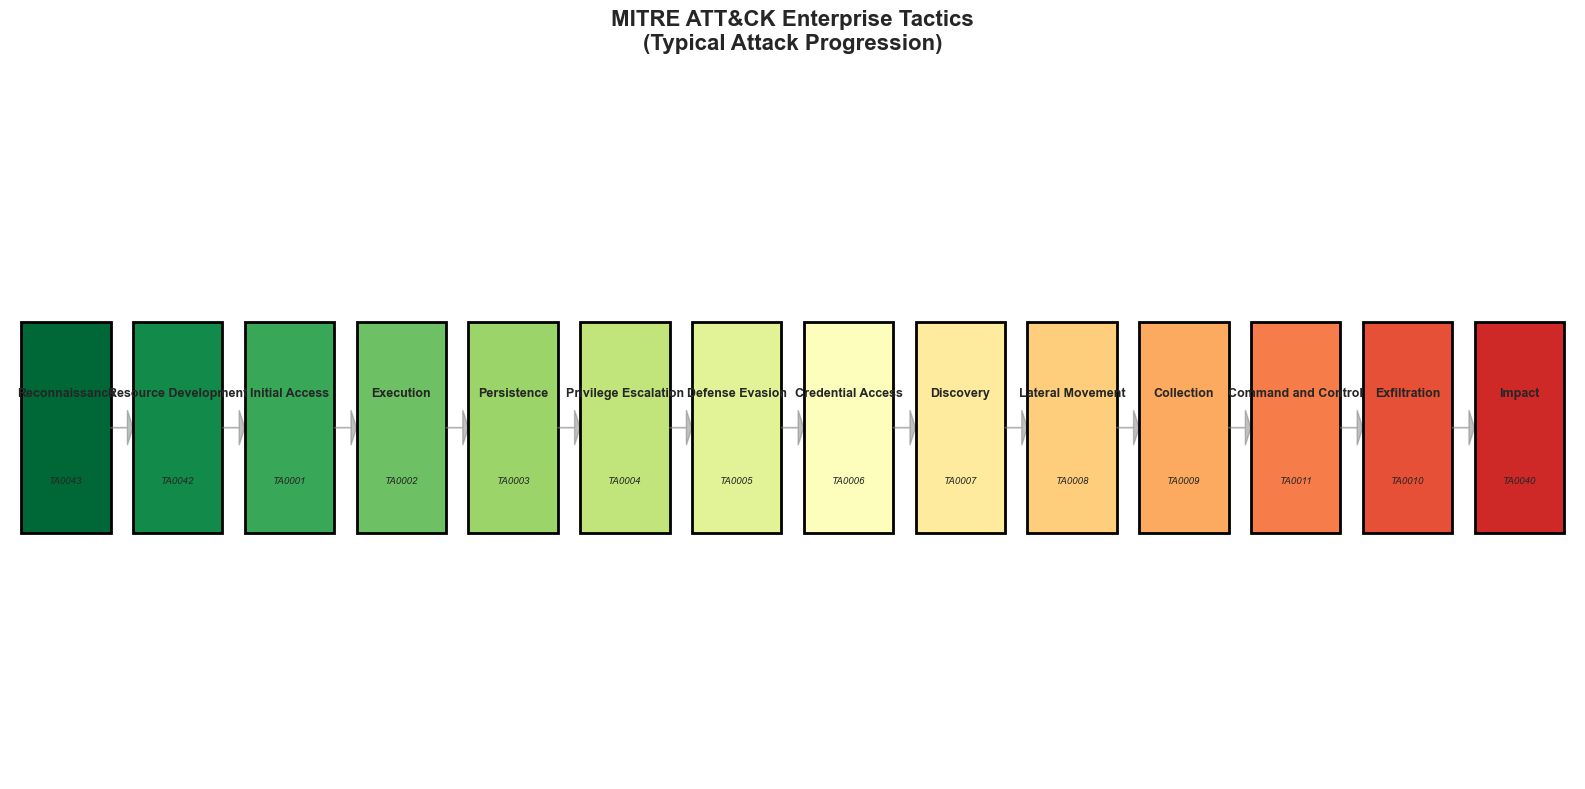


Note: In reality, adversaries move non-linearly between these tactics!


In [5]:
# Visualize tactics as a flowchart
fig, ax = plt.subplots(figsize=(16, 8))

# Create positions for tactics
positions = [
    (1, 3), (2, 3),  # Reconnaissance, Resource Development
    (3, 3), (4, 3),  # Initial Access, Execution
    (5, 3), (6, 3),  # Persistence, Privilege Escalation
    (7, 3), (8, 3),  # Defense Evasion, Credential Access
    (9, 3), (10, 3), # Discovery, Lateral Movement
    (11, 3), (12, 3), # Collection, Command and Control
    (13, 3), (14, 3) # Exfiltration, Impact
]

# Create color gradient
colors = plt.cm.RdYlGn_r(range(0, 256, 256 // len(tactics_df)))

for idx, (row, pos, color) in enumerate(zip(tactics_df.itertuples(), positions, colors)):
    # Draw tactic box
    rect = plt.Rectangle((pos[0]-0.4, pos[1]-0.3), 0.8, 0.6, 
                          facecolor=color, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    
    # Add tactic name
    ax.text(pos[0], pos[1]+0.1, row.Name, ha='center', va='center', 
            fontsize=9, fontweight='bold', wrap=True)
    ax.text(pos[0], pos[1]-0.15, row.ID, ha='center', va='center', 
            fontsize=7, style='italic')
    
    # Draw arrows between tactics
    if idx < len(tactics_df) - 1:
        ax.arrow(pos[0]+0.4, pos[1], 0.15, 0, head_width=0.1, 
                head_length=0.05, fc='gray', ec='gray', alpha=0.5)

ax.set_xlim(0.5, 14.5)
ax.set_ylim(2, 4)
ax.axis('off')
ax.set_title('MITRE ATT&CK Enterprise Tactics\n(Typical Attack Progression)', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nNote: In reality, adversaries move non-linearly between these tactics!")

## Part 9: Exploring Techniques

Now let's explore the techniques under each tactic.

In [6]:
# Extract all techniques
def get_techniques(attack_store):
    """
    Extract all techniques (parent techniques only, not sub-techniques)
    Returns a DataFrame with technique information
    """
    techniques = attack_store.query([Filter("type", "=", "attack-pattern")])
    
    techniques_data = []
    for technique in techniques:
        # Skip deprecated/revoked techniques
        if technique.get('revoked') or technique.get('x_mitre_deprecated'):
            continue
        
        # Get technique ID
        tech_id = technique['external_references'][0]['external_id']
        
        # Skip sub-techniques (they have format T1234.567)
        if '.' in tech_id:
            continue
        
        # Get tactics this technique maps to
        tactics = [phase['phase_name'] for phase in technique.get('kill_chain_phases', [])]
        
        # Get platforms
        platforms = technique.get('x_mitre_platforms', [])
        
        techniques_data.append({
            'ID': tech_id,
            'Name': technique['name'],
            'Description': technique['description'][:150] + '...',
            'Tactics': ', '.join(tactics),
            'Platforms': ', '.join(platforms),
            'Tactic_Count': len(tactics)
        })
    
    return pd.DataFrame(techniques_data)

# Get techniques
techniques_df = get_techniques(attack)

print(f"\nTotal Parent Techniques: {len(techniques_df)}")
print(f"\nSample techniques:\n")
print(techniques_df.head(10)[['ID', 'Name', 'Tactics']].to_string(index=False))


Total Parent Techniques: 216

Sample techniques:

   ID                                 Name                           Tactics
T1047   Windows Management Instrumentation                         execution
T1113                       Screen Capture                        collection
T1037 Boot or Logon Initialization Scripts persistence, privilege-escalation
T1557              Adversary-in-the-Middle     credential-access, collection
T1033          System Owner/User Discovery                         discovery
T1583               Acquire Infrastructure              resource-development
T1613     Container and Resource Discovery                         discovery
T1592       Gather Victim Host Information                    reconnaissance
T1003                OS Credential Dumping                 credential-access
T1129                       Shared Modules                         execution


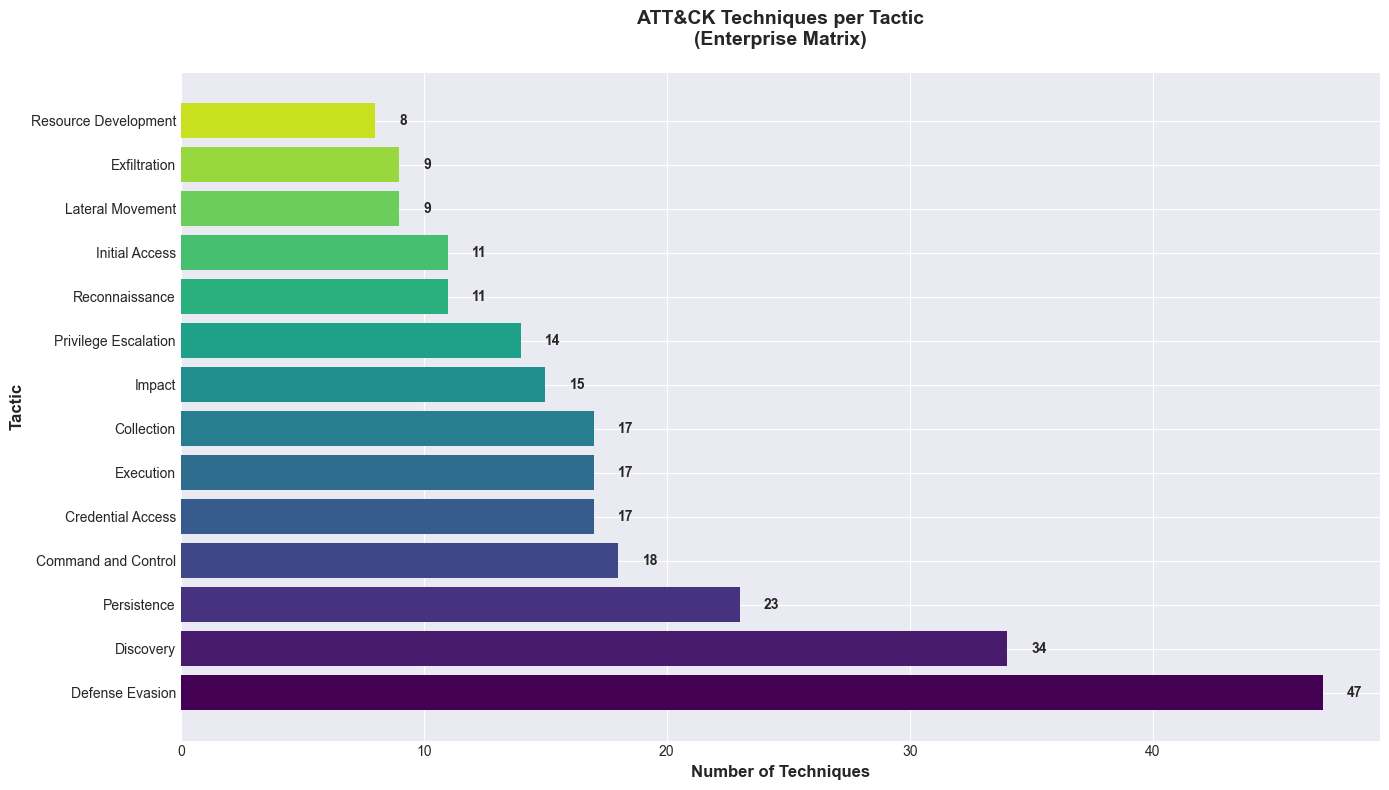


📊 Insights:
  • Most techniques: Defense Evasion (47 techniques)
  • Fewest techniques: Resource Development (8 techniques)
  • Average techniques per tactic: 17.9


In [7]:
# Count techniques per tactic
tactic_technique_count = {}
for tactic in tactics_df['Shortname']:
    count = techniques_df['Tactics'].str.contains(tactic, case=False).sum()
    tactic_technique_count[tactic] = count

# Create DataFrame for visualization
tactic_counts = pd.DataFrame(list(tactic_technique_count.items()), 
                             columns=['Tactic', 'Technique_Count'])

# Merge with tactic names for better labels
tactic_counts = tactic_counts.merge(
    tactics_df[['Shortname', 'Name']], 
    left_on='Tactic', 
    right_on='Shortname'
).sort_values('Technique_Count', ascending=False)

# Visualize
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(tactic_counts['Name'], tactic_counts['Technique_Count'], 
               color=plt.cm.viridis(range(0, 256, 256 // len(tactic_counts))))

ax.set_xlabel('Number of Techniques', fontsize=12, fontweight='bold')
ax.set_ylabel('Tactic', fontsize=12, fontweight='bold')
ax.set_title('ATT&CK Techniques per Tactic\n(Enterprise Matrix)', 
             fontsize=14, fontweight='bold', pad=20)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Insights:")
print(f"  • Most techniques: {tactic_counts.iloc[0]['Name']} ({tactic_counts.iloc[0]['Technique_Count']} techniques)")
print(f"  • Fewest techniques: {tactic_counts.iloc[-1]['Name']} ({tactic_counts.iloc[-1]['Technique_Count']} techniques)")
print(f"  • Average techniques per tactic: {tactic_counts['Technique_Count'].mean():.1f}")

## Exercise 1: Explore a Specific Technique

Let's examine **T1059 - Command and Scripting Interpreter** in detail.

This technique is extremely common in modern attacks because:
- Available on all operating systems
- Difficult to distinguish from legitimate admin activity
- Enables fileless attacks (living-off-the-land)

In [8]:
# Function to get detailed information about a technique
def get_technique_details(attack_store, technique_id):
    """
    Get comprehensive details about a specific technique
    """
    # Query for the technique
    techniques = attack_store.query([
        Filter("type", "=", "attack-pattern"),
        Filter("external_references.external_id", "=", technique_id)
    ])
    
    if not techniques:
        print(f"Technique {technique_id} not found!")
        return None
    
    technique = techniques[0]
    
    print(f"\n{'='*80}")
    print(f"Technique: {technique['name']} ({technique_id})")
    print(f"{'='*80}\n")
    
    print(f"Description:\n{technique['description']}\n")
    
    print(f"Tactics:")
    for phase in technique.get('kill_chain_phases', []):
        print(f"  • {phase['phase_name'].replace('-', ' ').title()}")
    
    print(f"\nPlatforms:")
    for platform in technique.get('x_mitre_platforms', []):
        print(f"  • {platform}")
    
    # Get sub-techniques
    subtechniques = attack_store.query([
        Filter("type", "=", "attack-pattern"),
        Filter("external_references.external_id", "contains", technique_id + ".")
    ])
    
    if subtechniques:
        print(f"\nSub-techniques ({len(subtechniques)}):")
        for sub in subtechniques:
            sub_id = sub['external_references'][0]['external_id']
            print(f"  • {sub_id} - {sub['name']}")
    
    # Get data sources
    data_sources = technique.get('x_mitre_data_sources', [])
    if data_sources:
        print(f"\nData Sources for Detection:")
        for ds in data_sources:
            print(f"  • {ds}")
    
    return technique

# Explore T1059
technique_details = get_technique_details(attack, "T1059")


Technique: Command and Scripting Interpreter (T1059)

Description:
Adversaries may abuse command and script interpreters to execute commands, scripts, or binaries. These interfaces and languages provide ways of interacting with computer systems and are a common feature across many different platforms. Most systems come with some built-in command-line interface and scripting capabilities, for example, macOS and Linux distributions include some flavor of [Unix Shell](https://attack.mitre.org/techniques/T1059/004) while Windows installations include the [Windows Command Shell](https://attack.mitre.org/techniques/T1059/003) and [PowerShell](https://attack.mitre.org/techniques/T1059/001).

There are also cross-platform interpreters such as [Python](https://attack.mitre.org/techniques/T1059/006), as well as those commonly associated with client applications such as [JavaScript](https://attack.mitre.org/techniques/T1059/007) and [Visual Basic](https://attack.mitre.org/techniques/T1059/005).


## Exercise 2: Techniques That Map to Multiple Tactics

Some techniques can be used to achieve multiple tactical objectives. Let's identify these.


Techniques mapped to multiple tactics: 28

Top 10 techniques by tactic coverage:

   ID                                Name  Tactic_Count                                                            Tactics
T1078                      Valid Accounts             4 defense-evasion, persistence, privilege-escalation, initial-access
T1205                   Traffic Signaling             3                  defense-evasion, persistence, command-and-control
T1574               Hijack Execution Flow             3                 persistence, privilege-escalation, defense-evasion
T1053                  Scheduled Task/Job             3                       execution, persistence, privilege-escalation
T1556       Modify Authentication Process             3                    credential-access, defense-evasion, persistence
T1133            External Remote Services             2                                        persistence, initial-access
T1040                    Network Sniffing             2 

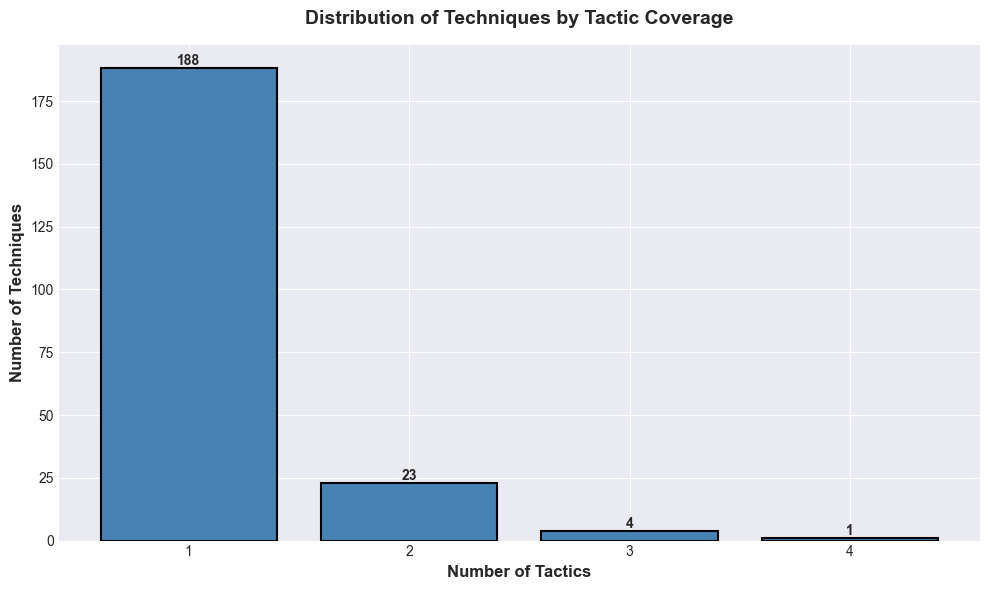


🔍 Why do some techniques map to multiple tactics?
   Example: Scheduled Task/Job (T1053)
   • Execution: Run scheduled code
   • Persistence: Maintain access via scheduled tasks
   • Privilege Escalation: Scheduled tasks can run with elevated privileges


In [9]:
# Find techniques that map to multiple tactics
multi_tactic_techniques = techniques_df[techniques_df['Tactic_Count'] > 1].sort_values(
    'Tactic_Count', ascending=False
)

print(f"\nTechniques mapped to multiple tactics: {len(multi_tactic_techniques)}\n")
print("Top 10 techniques by tactic coverage:\n")
print(multi_tactic_techniques.head(10)[['ID', 'Name', 'Tactic_Count', 'Tactics']].to_string(index=False))

# Visualize distribution
fig, ax = plt.subplots(figsize=(10, 6))
tactic_count_dist = techniques_df['Tactic_Count'].value_counts().sort_index()

bars = ax.bar(tactic_count_dist.index, tactic_count_dist.values, 
              color='steelblue', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Number of Tactics', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Techniques', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Techniques by Tactic Coverage', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(range(1, techniques_df['Tactic_Count'].max() + 1))

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🔍 Why do some techniques map to multiple tactics?")
print("   Example: Scheduled Task/Job (T1053)")
print("   • Execution: Run scheduled code")
print("   • Persistence: Maintain access via scheduled tasks")
print("   • Privilege Escalation: Scheduled tasks can run with elevated privileges")

## Summary & Key Takeaways

### What We've Learned:

1. **Threat Modeling Evolution**
   - Kill Chain provides strategic view (7 phases)
   - ATT&CK provides operational detail (14 tactics × 200+ techniques)
   - Both frameworks complement each other

2. **ATT&CK Data Model**
   - **Tactics:** The "why" - adversary goals
   - **Techniques:** The "how" - specific methods
   - **Sub-techniques:** More granular variants
   - **Groups, Software, Mitigations, Data Sources:** Supporting objects

3. **Key Insights from Data**
   - Defense Evasion and Privilege Escalation have the most techniques
   - Many techniques map to multiple tactics (flexible attacker tooling)
   - ATT&CK is continuously updated based on real-world observations

4. **Practical Applications**
   - Understanding TTPs enables behavior-based detection
   - Data sources guide telemetry collection requirements
   - Mitigations provide actionable defense recommendations

### Next Steps:

In **Notebook 2**, we'll:
- Query ATT&CK data programmatically for specific use cases
- Profile threat groups and their TTP patterns
- Build detection coverage matrices
- Analyze relationships between techniques, groups, and software

---

### 📝 Reflection Questions:

1. How would you use ATT&CK to improve detection in your organization?
2. Which tactic would be most critical to monitor in your environment? Why?
3. What challenges might you face when implementing ATT&CK-based detection?
4. How can ATT&CK help with threat hunting and incident response?

### 🔗 Additional Resources:
- ATT&CK Website: https://attack.mitre.org
- ATT&CK Navigator: https://mitre-attack.github.io/attack-navigator/
- Getting Started with ATT&CK: https://attack.mitre.org/resources/getting-started/